In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])
from scipy.stats import linregress

In [5]:
df = pd.read_csv('entropydata.csv')

In [7]:
df.head()

,Z,Atom,Sr,Sk,S,Smax,Omega,O
0,1,H,4.14473,2.42186,6.56659,7.9054,0.21113,120.26700
1,2,He,2.69851,3.91342,6.61193,7.0493,0.06240,100.36100
2,3,Li,3.07144,3.99682,7.69826,10.3578,0.25677,9.15713
3,4,Be,3.62386,4.19190,7.81450,10.3950,0.24829,8.45434
4,5,B,3.40545,4.70590,8.11135,10.3738,0.21810,15.96530


In [8]:
z = df['Z']
s = df['S']

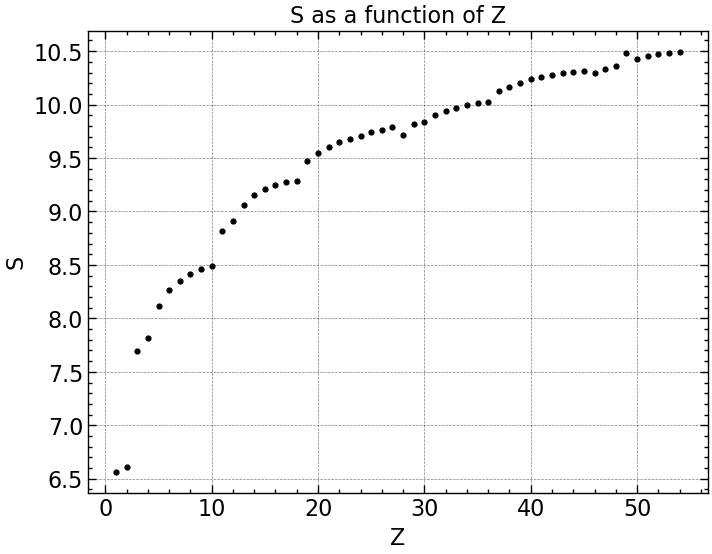

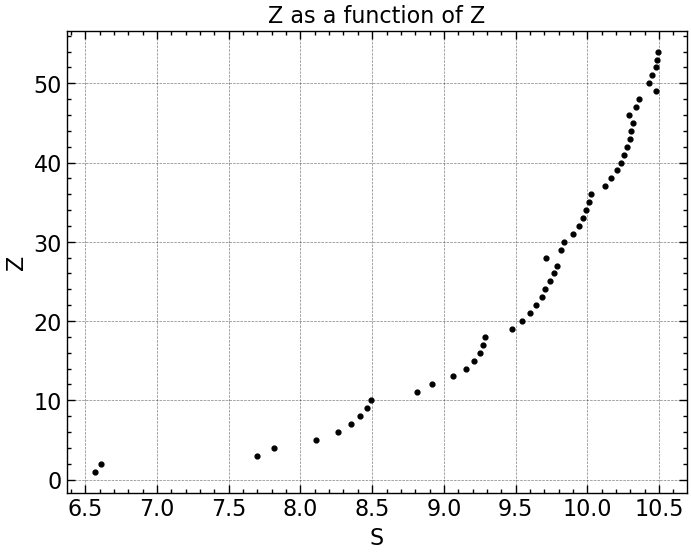

In [84]:
plt.scatter(z,s,color='k', s=12)
plt.xlabel('Z')
plt.ylabel('S')
plt.title('S as a function of Z')
plt.show()

plt.scatter(s,z,color='k',s=12)
plt.xlabel('S')
plt.ylabel('Z')
plt.title('Z as a function of Z')
plt.show()

We want to create an exponential formula. As the scatter plots imply, S should be the independent variable and the formula of the regression is the following:
$$ Z = a e^{b S} \Rightarrow ln(Z) = ln(a ) + b \cdot S$$

In [18]:
Y = np.log(z)
X = s

In [60]:
reg = linregress(X,Y)
lna = reg.intercept
a = np.exp(lna)
b = reg.slope

In [58]:
print(f'ln(a) = {reg.intercept:.5f}')
print(f'b = {reg.slope:.5f}')
print(f'R**2 = {reg.rvalue**2:.3f}')
print(f'Standard Error = {reg.stderr:.3f}')

ln(a) = -5.93913
b = 0.94386
R**2 = 0.989
Standard Error = 0.014


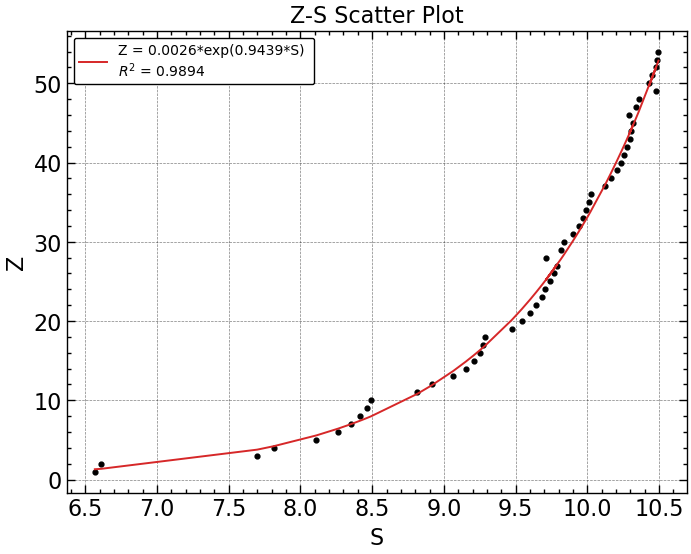

In [85]:
plt.scatter(s,z, color='k', s=12)
plt.plot(s, np.exp(lna)*np.exp(b*s), color='tab:red', linewidth=1.4, label=f'Z = {a:.4f}*exp({b:.4f}*S) \n$R^2$ = {reg.rvalue**2:.4f}')
plt.xlabel('S')
plt.ylabel('Z')
plt.title('Z-S Scatter Plot')
plt.legend(frameon=True, edgecolor='black', fontsize=10)
#plt.savefig('regression.png')
plt.show()